# Predicting Arctic Sea Ice Minima with UK rainfall and temp data, using machine learning


In this tutorial we will use UK rainfall and temp data to perform binary classification on arctic sea ice minima. Specifically speaking, we will try to use the UK rainfall and temperture from Jan-June, to predict if the minima that year will be greater or less than 4.2mnsqkm. This is a deliberately strange dataset to use, designed to show you how creative you can be with your thinking about what affects (correlates with) arctic sea ice minima. 

### it has many limitations but is written to have a low barrier to entry



The first cell reads in the data, which is rainfall and temperature by year (2011-2019) in East England and then creates an array containing the rainfall and temp data for Jan-June of that year.

I subset the data to yearly intervals using the 'index' variable within a for loop. As this is monthly data, set into years, the index is 12

This cell creates our X, this is our list of training features (the elements we use to train our classification model)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score



# read data from https://data.gov.uk/dataset/cb5b2810-2d41-47c0-9ca8-3514808675ac/average-rainfall-and-temperature
df=pd.read_csv('rainfalltemp.csv')

#only keep year, month, rainfall and temp columns
df=df[df['ReportingPeriodType']=='Monthly']
df=df.iloc[:,8:12]


#create an empty list variable
X=[]

#initialise the index variable
index=0

#we are examining 10 years, so a range between 0 and 10 to read through
for i in range(0,10):
    
    #select the range of monthly values for that year
    df_sub=df.iloc[index:index+12]
    
    #select only the jan-june months
    df_sub=df_sub.head(6)
    
    #get the rainfall and temp observations as a list
    janjune_rainfall=df_sub['Rainfallmm'].values.tolist()
    janjune_temp=df_sub['Temp'].values.tolist()
    
    #add 12 to the index
    index+=12
    
    #add these to the empty list
    X.append(janjune_rainfall+janjune_temp)
    


#convert the populated list to a numpy array (for the machine learning part)
X=np.array(X)
X

array([[ 69.5,  71.7,  65.1,  21.4,  22.1,  42.7,   0.8,   1.6,   5.5,
          8.2,   9.8,  14.3],
       [ 54.5,  82. ,  20.5,  10.3,  48.5,  62.9,   3.1,   5.4,   6. ,
         10.7,  11.5,  13.5],
       [ 47.2,  24.2,  21.9, 140.9,  62.3, 141.5,   4.3,   3.9,   7.8,
          6.4,  10.3,  12.5],
       [ 69.8,  34.3,  60.1,  22.1,  76.4,  40.8,   2.8,   2.6,   1.9,
          6.8,   9.9,  12.9],
       [118.5,  81.8,  44.2,  42. , 104.4,  45.5,   4.5,   5.3,   6.8,
          9.3,  11.5,  14.3],
       [ 62.7,  37. ,  45.6,  25.6,  82.5,  34.9,   3.5,   3.5,   5.6,
          8. ,  10. ,  12.9],
       [121.7,  53. ,  66.3,  70.3,  36.2,  76.5,   4.4,   3.9,   5.3,
          6.4,  11. ,  13.5],
       [ 39.4,  65.9,  63.9,  19.4,  42.9, 116. ,   3.3,   5.3,   7.6,
          8.2,  12.2,  15.1],
       [ 71.5,  46.7,  95.3,  78.2,  35.5,  26.6,   4.1,   2.1,   3.8,
          8.6,  12.2,  14.6],
       [ 22.8,  36.2,  82.2,  27.7,  52.1, 114.3,   3.4,   6. ,   7. ,
          7.8,  10.3

===========================================================================================================
===========================================================================================================

## create classification labels


This cell creates our y variable, our classifications (labels) for the data we use in X to train our model

In [2]:
#add the 2011-2019 minima to a new list

mins=[4.615,
4.344,
3.387,
5.054,
5.029,
4.433,
4.165,
4.665,
4.656,
4.192,
]

#use list comprehension to determine if the minima is less than our classification value of 4.2mnsqkm
low_min= ['true' if a < 4.2 else 'false' for a in mins]


#typical machine learning uses X and y, so make a y variable of low_min (its the same)
y=low_min
y=np.array(y)
y

array(['false', 'false', 'true', 'false', 'false', 'false', 'true',
       'false', 'false', 'true'], dtype='<U5')

===========================================================================================================
===========================================================================================================

## create and train model

This cell is the machine learning application. The SVC is trained on our data X, using our labels from Y. In this case our X consists of East England rainfall and temperature data for Jan-June each year, we are attempting a binary classification, to determine if the september minima of that year is > or < 4.2mnsqkm.



We use k-fold cross validation to determine how well the model performed.



This is intentionally simple, I wish to point out three very important points;

-firstly the shape of our data isnt great, i concatenated temperature onto the end of rainfall, thats not ideal.

-secondly, we dont have many years on which to train and validate, this can lead to overfitting

-thirdly, taking absolute values may not be as good as taking the residuals of observations (this means, subtracting the observations of minima from the linear regression). Using the residual as opposed to the absolute value would be better as the sea ice extent is decreasing year on year regardless


### finally, as this is binary classification, randomly guessing would have 50% accuracy, our null-hypothesis for a relationship is in this case, 50%, not 0%

### our model out-performs the null hypothesis model, but is also not perfect, at 78%

In [7]:
# this is the machine learning part, I chose an SVC, with a polynomial kernel and a class weight of 3, there are other kernels
# but for this application, polynomial performed the best
clf = svm.SVC(kernel='poly',C=3, random_state=42)

#k-fold cross validation involved randomly blinding certain groups of years and seeing how the model performs in terms of 
# correctly assigning them
scores = cross_val_score(clf, X, y, cv=3)

# the polynomial svc correctly determines if september minima will be less than 4.2mnsqkm 77.8% of the time,
# it is only allowed to train on east england rain and temperature data!

print("%0.2f percent accuracy with a standard deviation of %0.2f percent" % (scores.mean()*100, scores.std()*100))

77.78 percent accuracy with a standard deviation of 15.71 percent


===========================================================================================================
===========================================================================================================

## cross check using PCA on rainfall and temp


Lastly, i convert the 12 elements of our Xs (6 rainfall and 6 temp measurements) into only 2, using prinicipal component analysis. This allows us to observe on a graph whether their really is a potential relationship.

In PCA, typically we are looking for some kind of clustering (some kind of 'blob' or distinction between groups).

In this case there actually is weak clustering. Remember, the only data used is East England rain and temp, yet it appears to cluster arctic sea ice minima, and reflects the ML model findings.


#### PCA is not regression, clustering is important, not linearity (or other)

C:\Users\2087455F\Miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


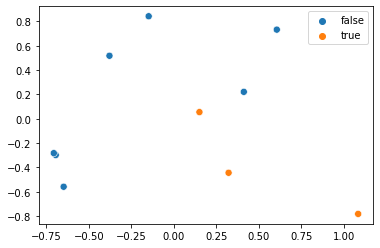

In [185]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler



# scale the X data to fit within scaled boundaries (improves PCA)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)


# reduce dimensions of the data to 2-dimensions (for plotting)
pca = PCA(n_components=2)
model=pca.fit(X)

X_pca=model.transform(X)
X_pca

#plot the data as scatter, true = sept minima below 4.2mnsqkm, false means above 4.2 mnsqkm
# can you observe a reasonable degree of clustering?
# this indicates that indeed, there may be a relationship
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue=y,s=50)